<a href="https://colab.research.google.com/github/Edu-Moreira/Edu-Moreira/blob/main/Strock_Analytics_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install investpy

     |████████████████████████████████| 4.4 MB 4.5 MB/s 
     |████████████████████████████████| 235 kB 52.9 MB/s 
     |████████████████████████████████| 6.4 MB 39.8 MB/s 
     |████████████████████████████████| 503 kB 44.7 MB/s 
  Created wheel for investpy: filename=investpy-1.0.8-py3-none-any.whl size=4481592 sha256=d70c29d4f4fc5d2e441c35013c57fcadebcffd59257c6a0ea329abca3b5794fb
  Stored in directory: /root/.cache/pip/wheels/96/a8/a5/0d33c72eaf00b41df7b9dc1e15d2b7c7154b3f1379ed350211
Successfully built investpy
  Attempting uninstall: pytz
    Found existing installation: pytz 2018.9
    Uninstalling pytz-2018.9:
      Successfully uninstalled pytz-2018.9
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [19]:
import pandas as pd
import investpy as inv
import matplotlib.pyplot as plt
import datetime as dt

In [11]:
#Cria variavel string com a data mais atual
hoje = dt.date.today()
hoje = hoje.strftime('%d/%m/%Y')

#Setando data inicial e final para as analises
data_inicial = '01/01/2000'
data_final = hoje

In [13]:
#Buscando dados Historicos de 1 acao especifica
stock_obj = 'vale3'
country_stock = 'brazil'
stock = inv.get_stock_historical_data(stock_obj,country_stock,from_date =data_inicial, to_date = data_final)
stock.tail()

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2022-03-14,94.98,95.20,91.25,91.60,37013000,BRL
2022-03-15,88.99,89.58,87.28,88.97,46984100,BRL
2022-03-16,91.89,93.88,89.31,91.13,37631000,BRL
2022-03-17,92.90,94.98,92.56,94.30,40577800,BRL
2022-03-18,95.41,96.09,93.80,96.09,45353600,BRL


(array([0.00e+00, 2.50e+07, 5.00e+07, 7.50e+07, 1.00e+08, 1.25e+08,
        1.50e+08, 1.75e+08, 2.00e+08]),
 <a list of 9 Text major ticklabel objects>)

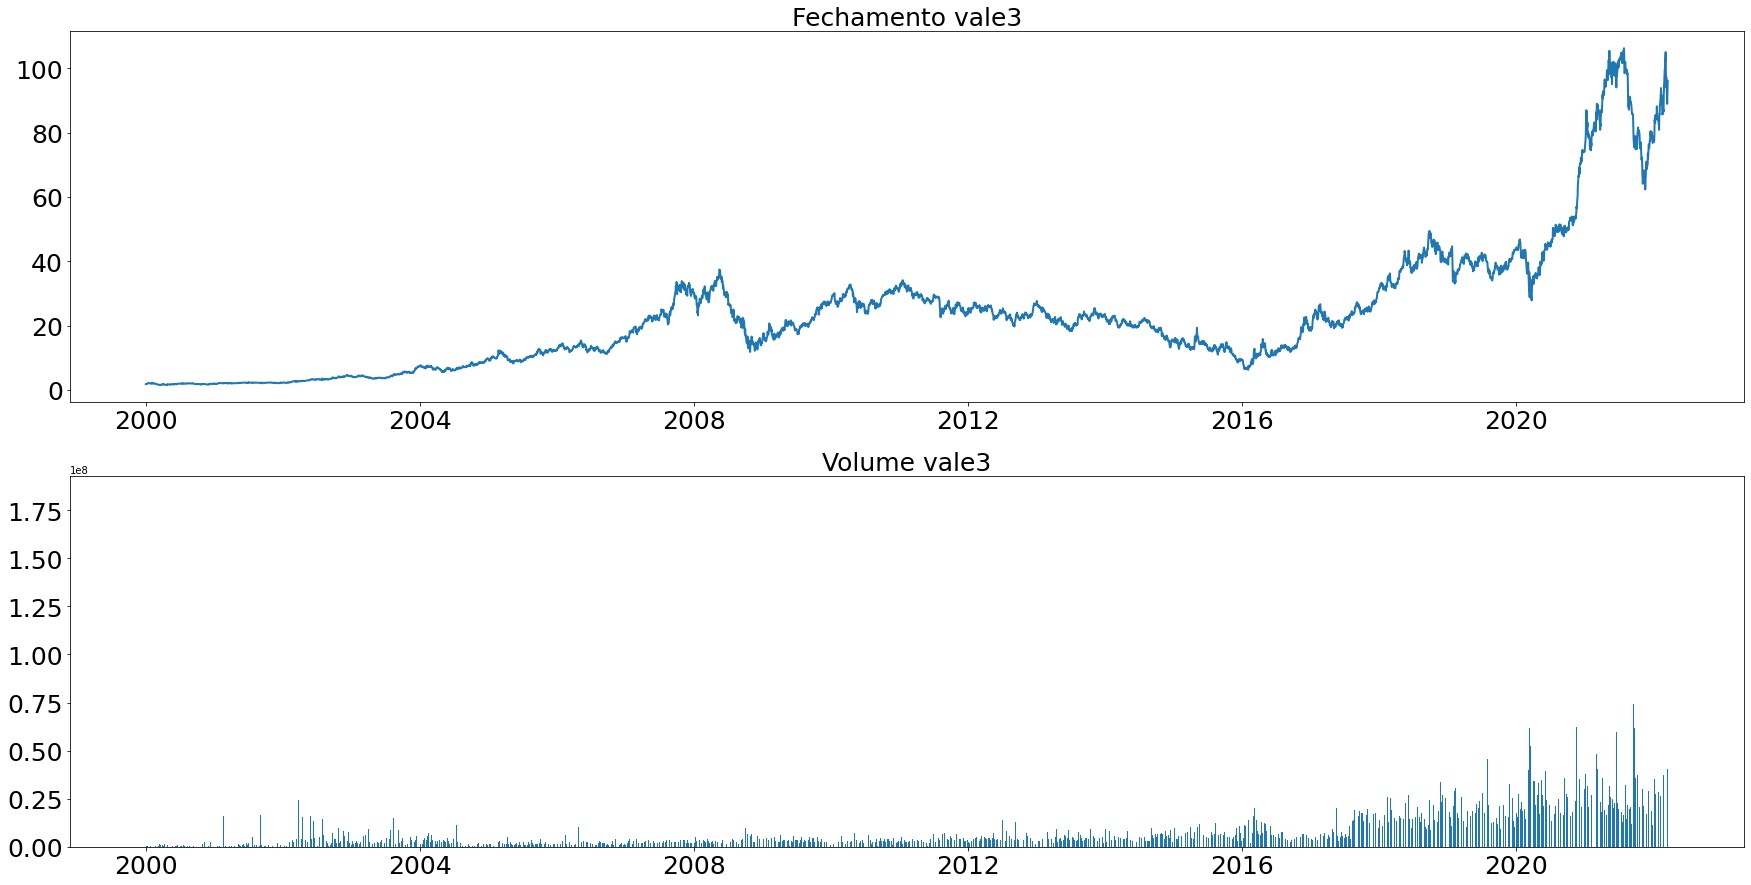

In [15]:
plt.figure(figsize=(30,15))  # create a plot figure

# create the first of two panels and set current axis
ax1 = plt.subplot(2, 1, 1) # (rows, columns, panel number)
ax1.set_title('Fechamento '+stock_obj,fontsize=25)
plt.plot(stock['Close'],linewidth=2)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

# create the second panel and set current axis
ax2=plt.subplot(2, 1, 2)
ax2.set_title('Volume '+stock_obj,fontsize=25)
plt.bar(stock.index,stock['Volume']);
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)


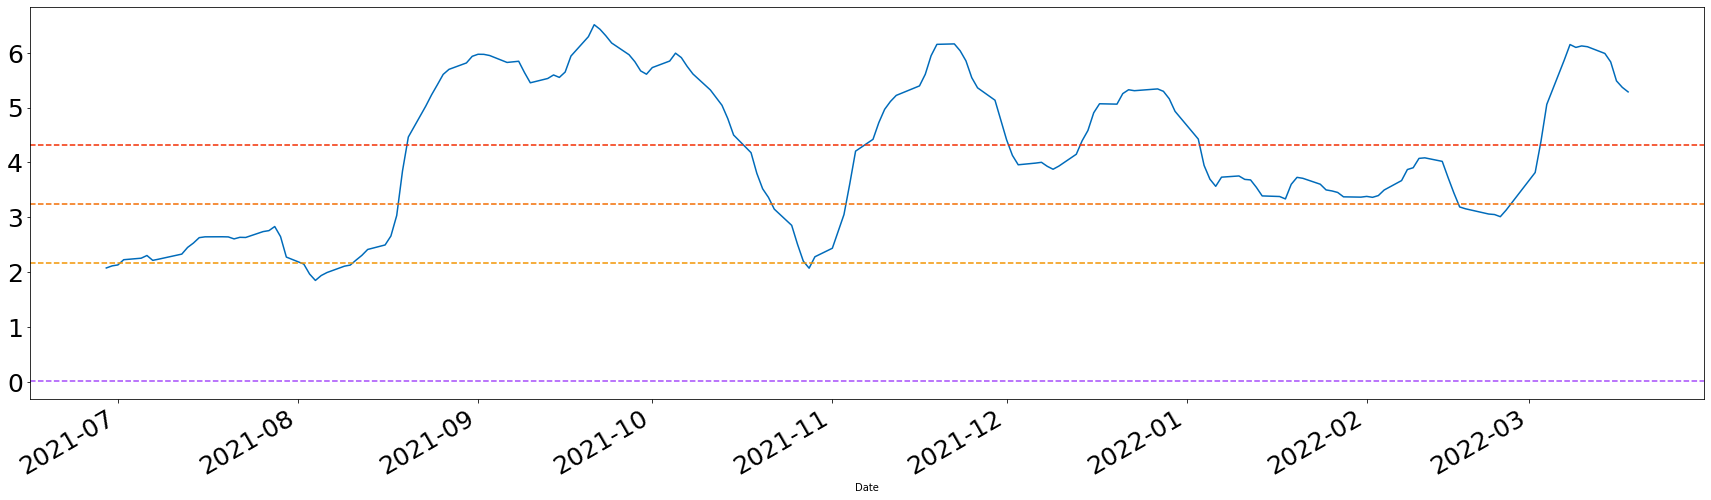

In [38]:
#Calculo da Volatilidade com desvio padrão do perido t
t = 30
stock['Vol'] =stock['Close'].rolling(t).std()

#Calculo das bandas de média + n*desvio-padrão
stockstd1 = stock['Vol'].mean()+stock['Vol'].std()
stockstd2= stock['Vol'].mean()+stock['Vol'].std()*2
stockstd3= stock['Vol'].mean()+stock['Vol'].std()*3


stockstd01 = stock['Vol'].mean()-stock['Vol'].std()
stockstd02= stock['Vol'].mean()-stock['Vol'].std()*2
stockstd03= stock['Vol'].mean()-stock['Vol'].std()*3

#plotando janela temporal
stock[-180:]['Vol'].plot(figsize = (30,8),color='#006bba')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.axhline(stockstd01, color='#a54bfa', linestyle='dashed')

plt.axhline(stockstd1, color='#f29400', linestyle='dashed')
plt.axhline(stockstd2, color='#f26c00', linestyle='dashed')
plt.axhline(stockstd3, color='#f22c00', linestyle='dashed')

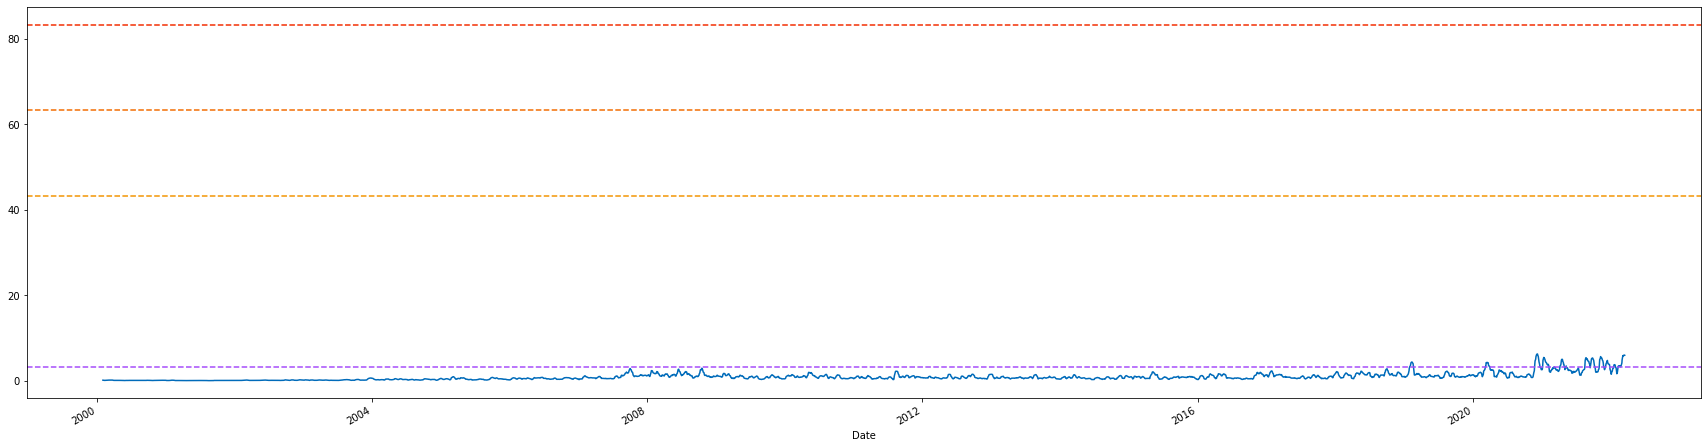

In [29]:
#Calculo da Volatilidade como a diferença entre máxima e mínima do dia
stock['Vol'] =stock['Close'].rolling(21).std()

#Calculo das bandas de média + n*desvio-padrão
stockstd1 = stock['Close'].mean()+stock['Close'].std()
stockstd2= stock['Close'].mean()+stock['Close'].std()*2
stockstd3= stock['Close'].mean()+stock['Close'].std()*3


stockstd01 = stock['Close'].mean()-stock['Close'].std()
stockstd02= stock['Close'].mean()-stock['Close'].std()*2
stockstd03= stock['Close'].mean()-stock['Close'].std()*3

#plotando janela temporal
stock['Vol'].plot(figsize = (30,8),color='#006bba')

plt.axhline(stockstd01, color='#a54bfa', linestyle='dashed')

plt.axhline(stockstd1, color='#f29400', linestyle='dashed')
plt.axhline(stockstd2, color='#f26c00', linestyle='dashed')
plt.axhline(stockstd3, color='#f22c00', linestyle='dashed')

In [39]:
#Criando uma lista com as acoes do IBRX
lista_stocks = ['vale3','petr4','itub4','bbdc4','b3sa3','abev3']

In [46]:
painel = pd.DataFrame()
for i in lista_stocks:
  painel [i]= inv.get_stock_historical_data(i,country_stock,from_date =data_inicial, to_date = data_final)['Close']
  painel = painel.dropna()

painel

,vale3,petr4,itub4,bbdc4,b3sa3,abev3
Date,,,,,,
2008-08-21,22.95,26.50,6.17,5.99,2.31,2.44
2008-08-22,22.58,26.42,6.23,6.02,2.31,2.47
2008-08-25,21.89,25.31,6.03,5.89,2.25,2.46
2008-08-26,21.91,25.60,5.96,5.77,2.25,2.42
2008-08-27,22.63,26.35,6.03,5.90,2.47,2.41
...,...,...,...,...,...,...
2022-03-14,91.60,31.87,25.19,20.85,13.26,13.32
2022-03-15,88.97,31.10,25.10,20.80,13.30,13.47
2022-03-16,91.13,30.83,25.59,21.10,13.60,13.78


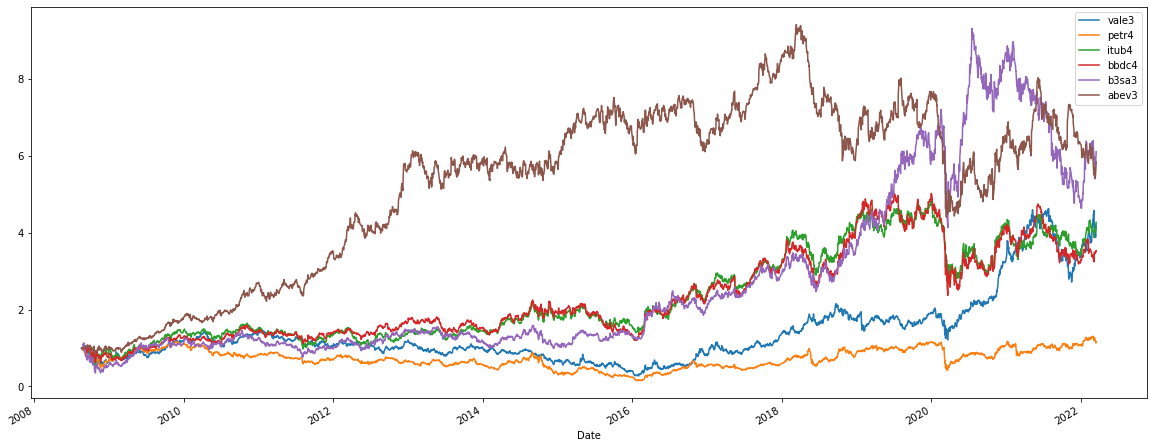

In [49]:
# Normalizando preços

normalizado = painel / painel.iloc[0]

normalizado.plot(figsize = (20,8));